Importing Libraries


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from datetime import timedelta

from google.colab import files
uploaded = files.upload()


Saving USDINR.csv to USDINR (1).csv


Importing dataset

In [ ]:
df = pd.read_csv("USDINR.csv")

# Data Cleaning

In [ ]:
df.head()

,Date,USD
0,11/07/2025,85.8536
1,10/07/2025,85.5780
2,09/07/2025,85.7979
3,08/07/2025,85.7188
4,07/07/2025,85.8150


In [ ]:
df.tail()

,Date,USD
3078,07/01/2009,48.61
3079,06/01/2009,48.68
3080,05/01/2009,48.37
3081,02/01/2009,48.89
3082,01/01/2009,48.73


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4312 entries, 2009-01-01 to 2025-07-11
Freq: B
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   USD     4312 non-null   float64
dtypes: float64(1)
memory usage: 67.4 KB


In [ ]:
print("Total missing values:\n", df.isnull().sum())


Total missing values:
 Date    0
USD     0
dtype: int64


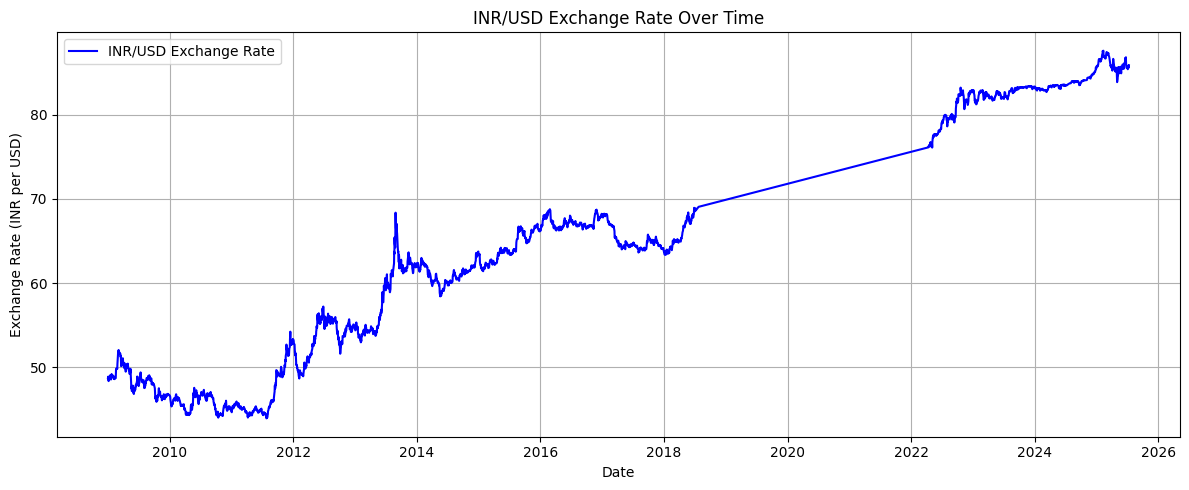

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

plt.figure(figsize=(12, 5))
plt.plot(df['Date'], df['USD'], label='INR/USD Exchange Rate', color='blue')
plt.title("INR/USD Exchange Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Exchange Rate (INR per USD)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



# ADT Test

In [ ]:
result = adfuller(df['USD'])

In [ ]:
print("ADF Statistic:", result[0])
print("p-value:", result[1])
for key, value in result[4].items():
    print(f"Critical Value {key}: {value}")
if result[1] < 0.05:
    print("Series is stationary (p < 0.05)")
else:
    print("Series is NOT stationary (p ≥ 0.05) — differencing needed")


ADF Statistic: -1.1933872755536306
p-value: 0.676433850423017
Critical Value 1%: -3.432477687087865
Critical Value 5%: -2.8624800782492534
Critical Value 10%: -2.5672704269177373
Series is NOT stationary (p ≥ 0.05) — differencing needed


In [ ]:
df_diff = df.diff().dropna()

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df_diff = df.diff().dropna()


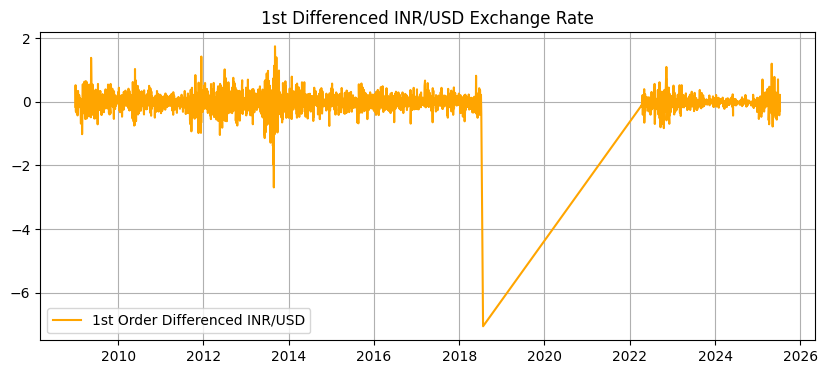

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(df_diff['USD'], color='orange', label='1st Order Differenced INR/USD')
plt.title("1st Differenced INR/USD Exchange Rate")
plt.grid(True)
plt.legend()
plt.show()



In [ ]:
result_diff = adfuller(df_diff['USD'])

print("ADF Statistic (Differenced):", result_diff[0])
print("p-value:", result_diff[1])
for key, value in result_diff[4].items():
    print(f"Critical Value {key}: {value}")

if result_diff[1] < 0.05:
    print("Differenced series is now stationary (p < 0.05)")
else:
    print("Still not stationary")



ADF Statistic (Differenced): -21.189662719589606
p-value: 0.0
Critical Value 1%: -3.432477687087865
Critical Value 5%: -2.8624800782492534
Critical Value 10%: -2.5672704269177373
Differenced series is now stationary (p < 0.05)


# ARIMA Model

In [ ]:
df = df.asfreq('B')
df = df.ffill()

In [ ]:
model = ARIMA(df['USD'], order=(1, 1, 1))
model_fit = model.fit()

In [ ]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                    USD   No. Observations:                 4312
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -37.257
Date:                Sat, 12 Jul 2025   AIC                             80.515
Time:                        16:21:38   BIC                             99.621
Sample:                    01-01-2009   HQIC                            87.262
                         - 07-11-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4016      0.514      0.781      0.435      -0.606       1.409
ma.L1         -0.4151      0.510     -0.813      0.416      -1.416       0.585
sigma2         0.0596      0.000    428.946      0.0

# Forecasting

In [ ]:
forecast_steps = 30
forecast = model_fit.forecast(steps=forecast_steps)

In [ ]:
last_date = df.index[-1]
last_value = df['USD'].iloc[-1]

In [ ]:
forecast_index = pd.date_range(start=last_date + timedelta(days=1), periods=forecast_steps, freq='B')

In [ ]:
forecast_index = pd.concat([pd.Series([last_date]), pd.Series(forecast_index)])
forecast_values = [last_value] + list(forecast)

In [ ]:
forecast_series = pd.Series(forecast_values, index=forecast_index)
print(forecast_series)

2025-07-11    85.853600
2025-07-14    85.850894
2025-07-15    85.849807
2025-07-16    85.849370
2025-07-17    85.849195
2025-07-18    85.849125
2025-07-21    85.849096
2025-07-22    85.849085
2025-07-23    85.849080
2025-07-24    85.849078
2025-07-25    85.849078
2025-07-28    85.849077
2025-07-29    85.849077
2025-07-30    85.849077
2025-07-31    85.849077
2025-08-01    85.849077
2025-08-04    85.849077
2025-08-05    85.849077
2025-08-06    85.849077
2025-08-07    85.849077
2025-08-08    85.849077
2025-08-11    85.849077
2025-08-12    85.849077
2025-08-13    85.849077
2025-08-14    85.849077
2025-08-15    85.849077
2025-08-18    85.849077
2025-08-19    85.849077
2025-08-20    85.849077
2025-08-21    85.849077
2025-08-22    85.849077
dtype: float64


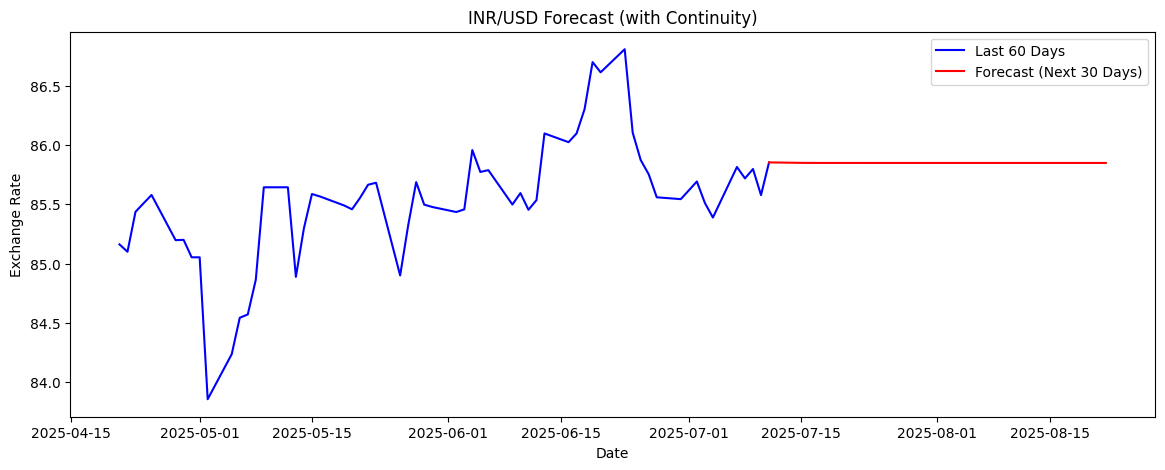

In [ ]:
plt.figure(figsize=(14, 5))
plt.plot(df.index[-60:], df['USD'].tail(60), label='Last 60 Days', color='blue')
plt.plot(forecast_index, forecast_values, label='Forecast (Next 30 Days)', color='red')
plt.title('INR/USD Forecast (with Continuity)')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()
